# Test de l'opérateur ProblemDiscontinuE

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [21]:
n_lim = 10**8
t_fin_lim = 100.0

In [19]:
# d = 6./100*Delta/2.
phy_prop_conv = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_no_conv = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=3.9 * 10**-5,
    schema="weno",
    time_scheme="euler",
    phy_prop=phy_prop_conv,
    cfl=0.5,
)
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)
markers.shift(0.00001)

dt fourier
6.918433404737903e-06
Cas : mixte, euler, weno, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224


<IPython.core.display.Javascript object>


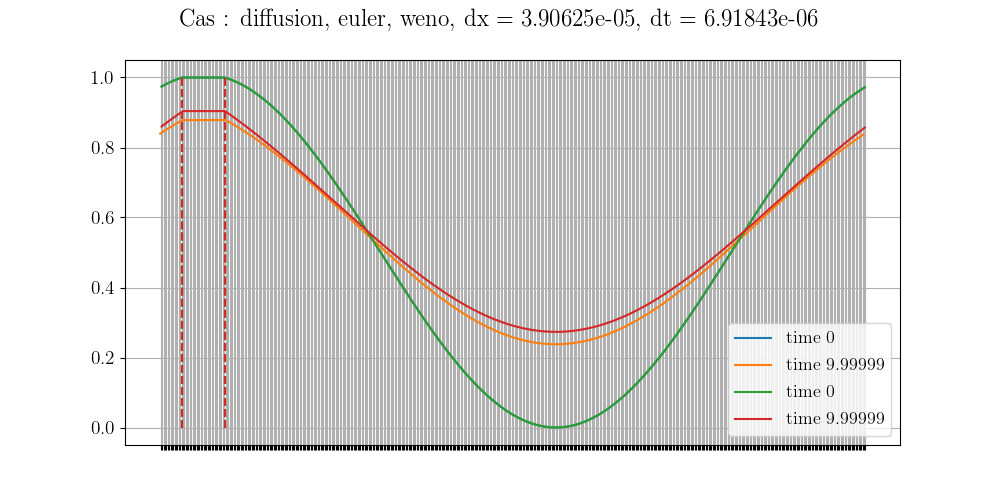

dt fourier
6.918433404737903e-06
Cas : diffusion, euler, weno, dx = 3.90625e-05, dt = 6.91843e-06
plotter mode changed to classic


<IPython.core.display.Javascript object>


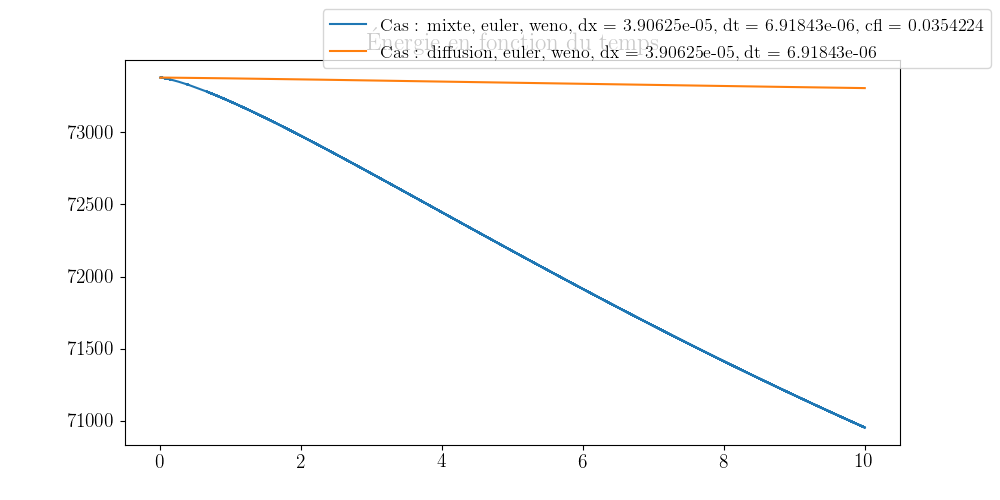

In [22]:
t_fin = 10.0
plot = Plotter("decale")

prob_conv = Problem(get_T, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop)
print(prob_conv.name)
print("==========================")
t, e = prob_conv.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

prob_no_conv = Problem(
    get_T, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop
)
print(prob_no_conv.name)
print("==========================")
plot.cas = "classic"
t1, e1 = prob_no_conv.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv.name)
l = ax1.plot(t1, e1 / (0.02 * 0.005 * 0.005), label=prob_no_conv.name)
le = fig1.legend()

dt fourier
6.918433404737903e-06
Cas : mixte, euler, weno, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224


<IPython.core.display.Javascript object>


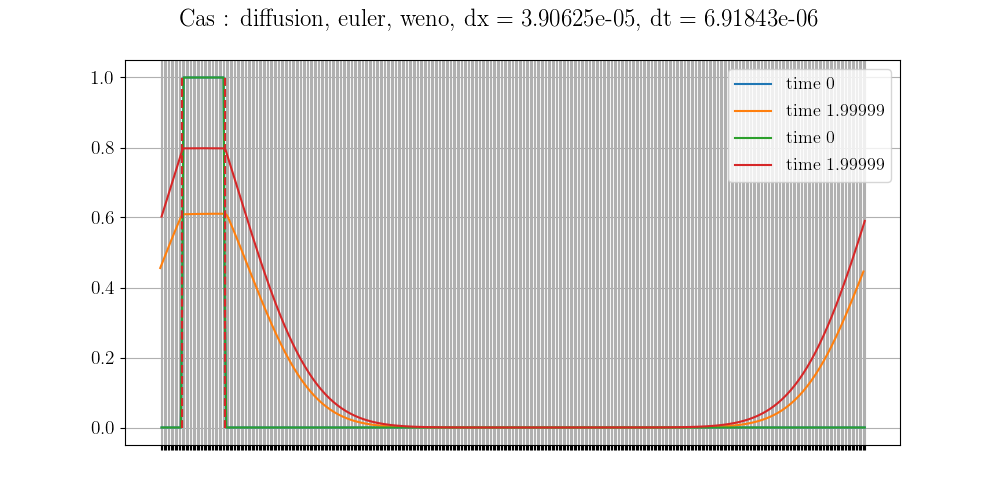

dt fourier
6.918433404737903e-06
Cas : diffusion, euler, weno, dx = 3.90625e-05, dt = 6.91843e-06
plotter mode changed to classic


<IPython.core.display.Javascript object>


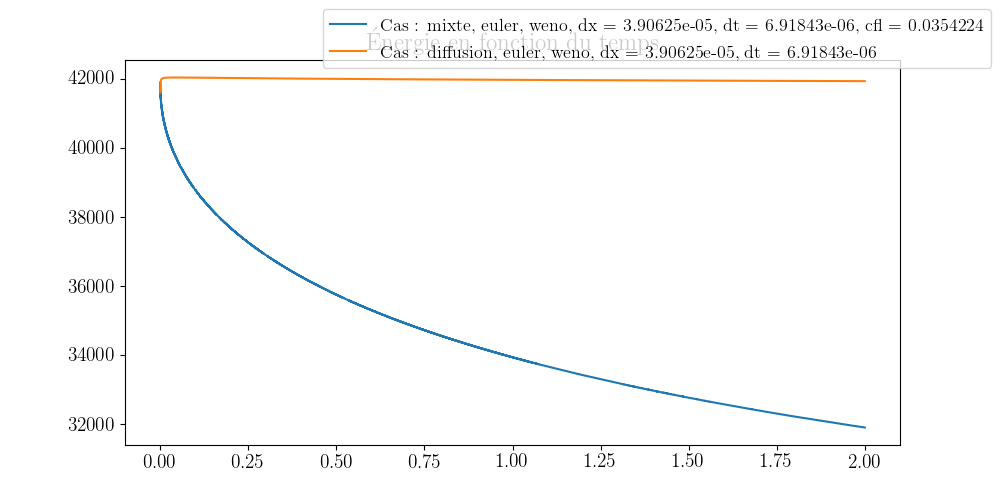

In [18]:
t_fin = 2.0
plot = Plotter("decale")

prob_conv = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop
)
print(prob_conv.name)
print("==========================")
t, e = prob_conv.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

prob_no_conv = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop
)
print(prob_no_conv.name)
print("==========================")
plot.cas = "classic"
t1, e1 = prob_no_conv.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob_conv.name)
l = ax1.plot(t1, e1 / (0.02 * 0.005 * 0.005), label=prob_no_conv.name)
le = fig1.legend()